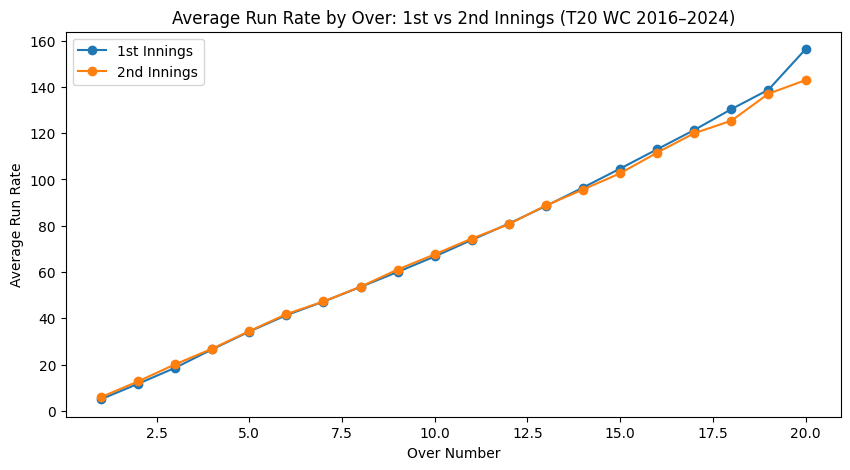

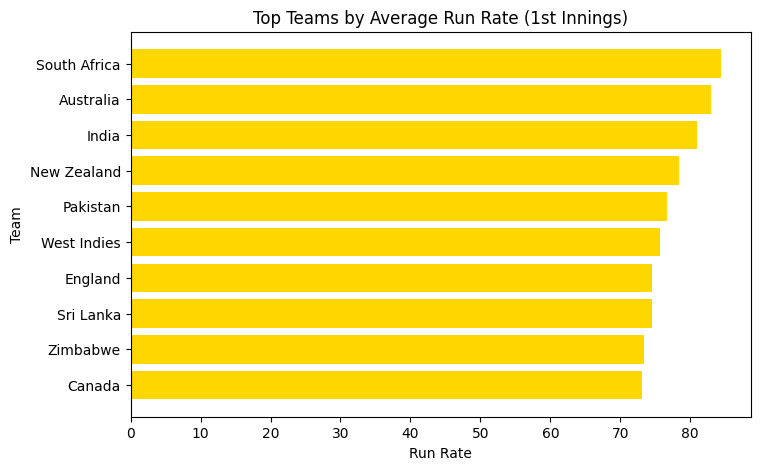

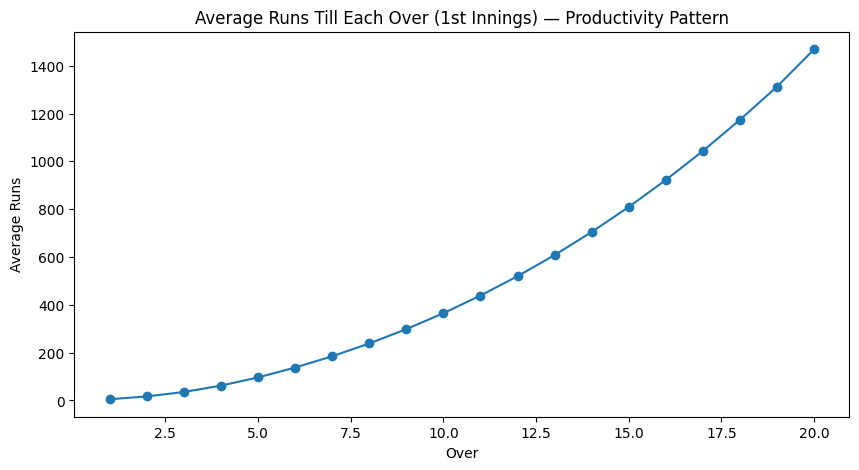

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# =========================
# LOAD DATA
# =========================
df1 = pd.read_csv("t20_score_prediction_1st_innings.csv")
df2 = pd.read_csv("t20_win_prediction_2nd_innings.csv")

# =========================
# STANDARDIZE COLUMN NAMES
# =========================
df1.columns = df1.columns.str.strip().str.lower()
df2.columns = df2.columns.str.strip().str.lower()

# =========================
# HELPER FUNCTION
# =========================
def find_column(df, keywords):
    for key in keywords:
        for col in df.columns:
            if key in col:
                return col
    return None

# =========================
# AUTO-DETECT COLUMNS
# =========================
over_col_1 = find_column(df1, ["over", "ball"])
over_col_2 = find_column(df2, ["over", "ball"])

runs_col_1 = find_column(df1, ["run"])
runs_col_2 = find_column(df2, ["run"])

year_col = find_column(df1, ["year"])
team_col_1 = find_column(df1, ["team"])
team_col_2 = find_column(df2, ["team"])

won_col = find_column(df2, ["won", "result"])
wicket_col = find_column(df2, ["wicket"])
batting_pos_col = find_column(df2, ["inning", "batting"])

# =========================
# CREATE OVER COLUMN
# =========================
df1["over"] = df1[over_col_1].astype(int)
df2["over"] = df2[over_col_2].astype(int)

# =========================
# 1. Average Run Rate by Over
# =========================
rr_1st = df1.groupby("over")[runs_col_1].mean()
rr_2nd = df2.groupby("over")[runs_col_2].mean()

plt.figure(figsize=(10,5))
plt.plot(rr_1st.index, rr_1st.values, marker='o', label="1st Innings")
plt.plot(rr_2nd.index, rr_2nd.values, marker='o', label="2nd Innings")
plt.title("Average Run Rate by Over: 1st vs 2nd Innings (T20 WC 2016–2024)")
plt.xlabel("Over Number")
plt.ylabel("Average Run Rate")
plt.legend()
plt.show()

# =========================
# 2. Average First Innings Score by Year
# =========================
if year_col:
    avg_score_year = (
        df1.groupby(year_col)[runs_col_1]
        .sum()
        .groupby(level=0)
        .mean()
    )

    plt.figure(figsize=(8,5))
    plt.bar(avg_score_year.index, avg_score_year.values, color="skyblue")
    plt.title("Average First Innings Score by Year")
    plt.xlabel("Year")
    plt.ylabel("Average 1st Innings Score")
    plt.show()

# =========================
# 3. Win Percentage While Chasing
# =========================
if won_col:
    chase = df2[won_col].value_counts(normalize=True) * 100

    plt.figure(figsize=(6,6))
    plt.pie(
        chase,
        labels=["Lost", "Won"],
        autopct="%1.1f%%",
        startangle=180,
        colors=["red", "green"]
    )
    plt.title("Win Percentage While Chasing (2nd Innings)")
    plt.show()

# =========================
# 4. Top Teams by Avg Run Rate (1st Innings)
# =========================
if team_col_1:
    team_rr = (
        df1.groupby(team_col_1)[runs_col_1]
        .mean()
        .sort_values(ascending=False)
        .head(10)
    )

    plt.figure(figsize=(8,5))
    plt.barh(team_rr.index, team_rr.values, color="gold")
    plt.title("Top Teams by Average Run Rate (1st Innings)")
    plt.xlabel("Run Rate")
    plt.ylabel("Team")
    plt.gca().invert_yaxis()
    plt.show()

# =========================
# 5. Productivity Pattern (Cumulative Runs)
# =========================
cumulative_runs = df1.groupby("over")[runs_col_1].mean().cumsum()

plt.figure(figsize=(10,5))
plt.plot(cumulative_runs.index, cumulative_runs.values, marker='o')
plt.title("Average Runs Till Each Over (1st Innings) — Productivity Pattern")
plt.xlabel("Over")
plt.ylabel("Average Runs")
plt.show()

# =========================
# 6. Wickets Lost vs Match Outcome
# =========================
if wicket_col and won_col:
    loss_w = df2[df2[won_col] == 0][wicket_col]
    win_w = df2[df2[won_col] == 1][wicket_col]

    plt.figure(figsize=(6,5))
    plt.boxplot([loss_w, win_w], labels=["0", "1"])
    plt.title("Wickets Lost vs Match Outcome (2nd Innings)")
    plt.xlabel("Did Win (0 = Loss, 1 = Win)")
    plt.ylabel("Wickets Lost")
    plt.show()

# =========================
# 7. Batting First vs Batting Second (FIXED)
# =========================
if batting_pos_col and won_col:

    # Keep only valid batting positions
    bat_df = df2[df2[batting_pos_col].isin([1, 2])]

    bat_win = bat_df.groupby(batting_pos_col)[won_col].mean() * 100
    bat_win = bat_win.sort_index()

    plt.figure(figsize=(6,6))
    plt.pie(
        bat_win.values,
        labels=["Batting First Wins", "Batting Second Wins"],
        autopct="%1.1f%%",
        startangle=180,
        colors=["gold", "lightgreen"]
    )
    plt.title("Who Wins More? (Based on T20 World Cup Data)")
    plt.show()

# =========================
# 8. Winning Percentage of Teams
# =========================
if team_col_2 and won_col:
    team_win_pct = (
        df2.groupby(team_col_2)[won_col]
        .mean()
        .sort_values(ascending=False) * 100
    )

    plt.figure(figsize=(10,7))
    plt.barh(team_win_pct.index, team_win_pct.values, color="lightblue")
    plt.title("Winning Percentage of Teams (T20 WC Dataset)")
    plt.xlabel("Winning Percentage (%)")
    plt.ylabel("Teams")
    plt.gca().invert_yaxis()
    plt.show()
